In [4]:
import pandas as pd
import nltk

In [5]:
#data_encoded="ISO-8859-1"
data = pd.read_csv('Downloads/Reddit-ADPS-Data_2.csv',encoding= 'unicode_escape')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8330 entries, 0 to 8329
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   post        8315 non-null   object 
 1   topics      8330 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 260.4+ KB


In [7]:
data.shape


(8330, 4)

In [8]:
data.head()

,post,topics,Unnamed: 2,Unnamed: 3
0,Does anyone else get anxious with working? im ...,anxiety,NaN,NaN
1,Help with anxiety-inducing fears about school ...,anxiety,NaN,NaN
2,Use up what's left and throw the rest away I r...,anxiety,NaN,NaN
3,My brain is driving me crazy! Im a perfectioni...,anxiety,NaN,NaN
4,Does anyone else feel like the worst person ev...,anxiety,NaN,NaN


In [9]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        post  topics  Unnamed: 2  Unnamed: 3
0     False   False        True        True
1     False   False        True        True
2     False   False        True        True
3     False   False        True        True
4     False   False        True        True
...     ...     ...         ...         ...
8325  False   False        True        True
8326  False   False        True        True
8327  False   False        True        True
8328  False   False        True        True
8329  False   False        True        True

[8330 rows x 4 columns]>

In [10]:
#REMOVING COLUMNS
#data.drop(columns=['Unnamed: 2','Unnamed: 3'],inplace=True)

In [11]:
data.head()

,post,topics,Unnamed: 2,Unnamed: 3
0,Does anyone else get anxious with working? im ...,anxiety,NaN,NaN
1,Help with anxiety-inducing fears about school ...,anxiety,NaN,NaN
2,Use up what's left and throw the rest away I r...,anxiety,NaN,NaN
3,My brain is driving me crazy! Im a perfectioni...,anxiety,NaN,NaN
4,Does anyone else feel like the worst person ev...,anxiety,NaN,NaN


In [12]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
data= data [['post','topics']]
#data.head()
#checking the count of the dependent variable
data['post'].value_counts()


C:\Users\Dell\AppData\Local\Temp\ipykernel_2844\384509375.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


"No regrets or grudges/angry at things that have passed, and not worrying too much about the future, that's true serenity."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
but my heart is still restless even though my mouth is talking                                                                                                                                                                             

In [13]:
display(data)

,post,topics
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety
3,"My brain is driving me crazy! Im a perfectionist and think everyone hates me all the time. I literally always worried Ive done something wrong. \n\nIm at my first big professional conference in a major us city. I barely slept last night because of a backache and nerves. That and the jet lag is impairing my functioning and I have blotchy skin and my dress is riding up on my legs and Ive had to pull it down. All I had to do today was register for the conference, but I was confused at every step and feel that everyone thinks Im stupid or hungover or unprofessional or something. Im walking around this city I do not know oblivious and feel embarrassed and stupid. My anxiety is killing me and men keep hitting on me. I havent been away from my husband since we moved in together and I feel so dumb and small. \n\nIm so scared for my presentation tomorrow. Can someone either console me or kindly put me out of my misery?",anxiety
4,"Does anyone else feel like the worst person ever if they annoy a friend? Hey Reddit. Basically, I have mild anxiety. But something that really messes with my head is when I have a fall out or get a blunt text from a friend to say I annoyed them when I did something. My first response is always I'm sorry (and trying not to say it a million times over) but my mind then goes through this turmoil where I have all these esteem lowering thoughts along the lines of, they'll hate me forever now, or I'm such a horrible person, as well as being filled with guilt for upsetting the person.\nIt always turns out that whatever I did wrong only annoyed them for a short period of time and before I knew it life is back to normal, I just wish I could control the horrible negative wave that comes over me",anxiety
...,...,...
8325,"alone, useless and horribly guilty reaching out here because i have nothing else. no friends or family or anything. no money 

In [14]:
data.isnull().sum()

post      15
topics    0 
dtype: int64

In [15]:
data=data.dropna()

In [16]:
data.isnull().sum()

post      0
topics    0
dtype: int64

In [17]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#defining the function to remove punctuation
def remove_punctuation(post):
    text_nopunc=[c for c in post if c not in string.punctuation]
    punc=''.join(text_nopunc)
    return punc
data['clean_text'] = data['post'].apply(lambda x:remove_punctuation(x))
data.head()

,post,topics,clean_text
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,Does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,Help with anxietyinducing fears about school caused by a health issue Im 35 and planning to go back to grad school but over the years I developed some eye floaters that I can mostly ignore They are just out of my visible sight range when reading small books like novels but I started studying for the GRE with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how Im going to cope with school if on top of everything else like how Im no longer used to student life how grad school is likely the hardest form of school Ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me\n\nI really dont know how to deal here I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I dont have to deal with them Its not a big issue and some junk in my eyes shouldnt be THAT much of a problem But just now I just glanced at my book for a few minutes and now Im dizzy with worry about it\n\nWhat to do
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,Use up whats left and throw the rest away I recently returned from 6 years working overseas\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health\n\nIm doing fine now as far as that is concerned Attended therapy clean and sober since November last year\n\nWhen I came back I heard a few of my friends use the following phrase\n\nwell just use up whats left of him and then throw the rest away\n\nIve never heard this before Ive always been a people pleasing personality type and Im struggling hard to determine how to interpret it\n\nMaybe I just dont want to face facts that it means exactly what

In [19]:
#Removing URL
#The http characters in the regex match the literal characters.
#\S matches any character that is not a whitespace character
#The question mark ? causes the regular expression to match 0 or 1 repetitions of the preceding character
#We then have the colon and two forward slashes :// to complete the protocol.
#data['clean_text']=data['clean_text'].str.replace("http\S+"," ")
import re
data['clean_text']=data['clean_text'].str.replace(r"http\S+"," ")
data['clean_text']=data['clean_text'].str.replace("\n","  ")
data['clean_text']=data['clean_text'].str.replace("â€™","  ")
data['clean_text']=data['clean_text'].str.replace("Ã¢â¬Å","  ")
#data['clean_text']=data['clean_text'].str.replace("ã¢â¬â","  ")
#data['clean_text']=data['clean_text'].str.replace("Ã¢â¬â¢","  ") 

C:\Users\Dell\AppData\Local\Temp\ipykernel_2844\3971192541.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_text']=data['clean_text'].str.replace(r"http\S+"," ")


In [20]:
display(data)

,post,topics,clean_text
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,Does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,Help with anxietyinducing fears about school caused by a health issue Im 35 and planning to go back to grad school but over the years I developed some eye floaters that I can mostly ignore They are just out of my visible sight range when reading small books like novels but I started studying for the GRE with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how Im going to cope with school if on top of everything else like how Im no longer used to student life how grad school is likely the hardest form of school Ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me I really dont know how to deal here I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I dont have to deal with them Its not a big issue and some junk in my eyes shouldnt be THAT much of a problem But just now I just glanced at my book for a few minutes and now Im dizzy with worry about it What to do
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,Use up whats left and throw the rest away I recently returned from 6 years working overseas Unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health Im doing fine now as far as that is concerned Attended therapy clean and sober since November last year When I came back I heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away Ive never heard this before Ive always been a people pleasing personality type and Im struggling hard to determine how to interpret it Maybe I just dont want to face facts that it means exactly what it says That by hanging

In [21]:
#to remove non-ascii characters, using str.encode with errors='ignore':
data['clean_text'] = data['clean_text'].str.encode('ascii', 'ignore').str.decode('ascii')
display(data)

,post,topics,clean_text
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,Does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,Help with anxietyinducing fears about school caused by a health issue Im 35 and planning to go back to grad school but over the years I developed some eye floaters that I can mostly ignore They are just out of my visible sight range when reading small books like novels but I started studying for the GRE with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how Im going to cope with school if on top of everything else like how Im no longer used to student life how grad school is likely the hardest form of school Ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me I really dont know how to deal here I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I dont have to deal with them Its not a big issue and some junk in my eyes shouldnt be THAT much of a problem But just now I just glanced at my book for a few minutes and now Im dizzy with worry about it What to do
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,Use up whats left and throw the rest away I recently returned from 6 years working overseas Unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health Im doing fine now as far as that is concerned Attended therapy clean and sober since November last year When I came back I heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away Ive never heard this before Ive always been a people pleasing personality type and Im struggling hard to determine how to interpret it Maybe I just dont want to face facts that it means exactly what it says That by hanging

In [22]:
#Emoji removal
import cleantext
#pip install clean-text

In [23]:
#clean is the function provided by the cleantext library.
from cleantext import clean
clean(data['clean_text'], no_emoji=True)
#display(data)

'0 does anyone else get anxious with working im scared that im going to have to do repairs that cost of money\n1 help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have t

In [24]:
#Lowercase
data['clean_text']= data['clean_text'].apply(lambda x: x.lower())
display(data)  

,post,topics,clean_text
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,does anyone else get anxious with working im scared that im going to have to do repairs that cost of money
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,help with anxietyinducing fears about school caused by a health issue im 35 and planning to go back to grad school but over the years i developed some eye floaters that i can mostly ignore they are just out of my visible sight range when reading small books like novels but i started studying for the gre with a big textbook and realized how obvious these floaters were now and theyve left me with anxiety about how im going to cope with school if on top of everything else like how im no longer used to student life how grad school is likely the hardest form of school ive ever done etc add to that this problem with distracting floaters in my eyes that distract and annoy me i really dont know how to deal here i am not confident in exposure therapy as i have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that i dont have to deal with them its not a big issue and some junk in my eyes shouldnt be that much of a problem but just now i just glanced at my book for a few minutes and now im dizzy with worry about it what to do
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,use up whats left and throw the rest away i recently returned from 6 years working overseas unfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health im doing fine now as far as that is concerned attended therapy clean and sober since november last year when i came back i heard a few of my friends use the following phrase well just use up whats left of him and then throw the rest away ive never heard this before ive always been a people pleasing personality type and im struggling hard to determine how to interpret it maybe i just dont want to face facts that it means exactly what it says that by hanging

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
data['clean_text'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
data.head()

,post,topics,clean_text
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,anxiety,anyone else get anxious working im scared im going repairs cost money
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",anxiety,help anxietyinducing fears school caused health issue im 35 planning go back grad school years developed eye floaters mostly ignore visible sight range reading small books like novels started studying gre big textbook realized obvious floaters theyve left anxiety im going cope school top everything else like im longer used student life grad school likely hardest form school ive ever done etc add problem distracting floaters eyes distract annoy really dont know deal confident exposure therapy floaters years really learned deal changing lifestyle dont deal big issue junk eyes shouldnt much problem glanced book minutes im dizzy worry
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",anxiety,use whats left throw rest away recently returned 6 years working overseas unfortunately last years drinking stimulant became worse detrimental mental physical health im fine far concerned attended therapy clean sober since november last year came back heard friends use following phrase well use whats left throw rest away ive never heard ive always people pleasing personality type im struggling hard determine interpret maybe dont want face facts means exactly says hanging around people put weak position arent real friends thoughts
3,"My brain is driving me crazy! Im a perfectionist and think everyone hates me all the time. I literally always worried Ive done something wrong. \n\nIm at my first big professional conference in a major us city. I barely slept last night because of a backache and nerves. That and the jet lag is impairing my functioning and I have blotchy skin and my dress is riding up on my legs and Ive had to pull it down. All I had to do today was register for the conference, but I was confused at every step and feel that everyone thinks Im stupid or hungover or unprofessional or something. Im walking around this city I do not know obli

In [28]:
# Renaming categories
data.replace({'topics':
    {'anxiety':'Anxiety',
    'depression':'Depression',
    'ptsd':'PTSD',
    'socialanxiety':'Social Anxiety',
    'suicidewatch':'Suicidal thoughts',
    }},
             inplace=True)
    
pd.DataFrame(data.topics.unique()).values

array([['Anxiety'],
       ['Depression'],
       ['PTSD'],
       ['Social Anxiety'],
       ['Suicidal thoughts']], dtype=object)

In [29]:
#Now, we will map each of these categories to a number, so that our model can understand it in a better way and we will save this in a new column named ‘category_id’. Where each of the 5 categories is represented in numerical.
# Create a new column 'category_id' with encoded categories 
data['category_id'] = data['topics'].factorize()[0]
category_id_df = data[['topics', 'category_id']].drop_duplicates()

In [30]:
category_id_df

,topics,category_id
0,Anxiety,0
1666,Depression,1
3332,PTSD,2
4998,Social Anxiety,3
6664,Suicidal thoughts,4


In [31]:
# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'topics']].values)
# New dataframe
data.head()

,post,topics,clean_text,category_id
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,anyone else get anxious working im scared im going repairs cost money,0
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",Anxiety,help anxietyinducing fears school caused health issue im 35 planning go back grad school years developed eye floaters mostly ignore visible sight range reading small books like novels started studying gre big textbook realized obvious floaters theyve left anxiety im going cope school top everything else like im longer used student life grad school likely hardest form school ive ever done etc add problem distracting floaters eyes distract annoy really dont know deal confident exposure therapy floaters years really learned deal changing lifestyle dont deal big issue junk eyes shouldnt much problem glanced book minutes im dizzy worry,0
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",Anxiety,use whats left throw rest away recently returned 6 years working overseas unfortunately last years drinking stimulant became worse detrimental mental physical health im fine far concerned attended therapy clean sober since november last year came back heard friends use following phrase well use whats left throw rest away ive never heard ive always people pleasing personality type im struggling hard determine interpret maybe dont want face facts means exactly says hanging around people put weak position arent real friends thoughts,0
3,"My brain is driving me crazy! Im a perfectionist and think everyone hates me all the time. I literally always worried Ive done something wrong. \n\nIm at my first big professional conference in a major us city. I barely slept last night because of a backache and nerves. That and the jet lag is impairing my functioning and I have blotchy skin and my dress is riding up on my legs and Ive had to pull it down. All I had to do today was register for the conference, but I was confused at every step and feel that everyone thinks Im stupid or hungover or unprofessional or something. Im walking around this city 

In [32]:
category_to_id

id_to_category

{0: 'Anxiety',
 1: 'Depression',
 2: 'PTSD',
 3: 'Social Anxiety',
 4: 'Suicidal thoughts'}

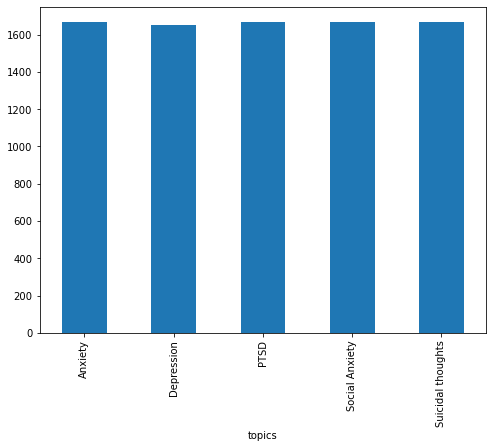

In [33]:
#number of posts per catagory
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('topics').clean_text.count().plot.bar(ylim=0)
plt.show()

In [34]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [35]:
#feature extraction,during the preprocessing step, the texts are converted to a more manageable representation
#Term Frequency, Inverse Document Frequency,
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2',# is set to True to use a logarithmic form for frequency.
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(data.clean_text).toarray()
labels = data.category_id
print("Each of the %d posts is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 8315 posts is represented by 18701 features (TF-IDF score of unigrams and bigrams)


In [36]:
# Finding the three most correlated terms with each of the topic categories
N = 3
for topics, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("n==> %s:" %(topics))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Anxiety:
  * Most Correlated Unigrams are: attack, panic, anxiety
  * Most Correlated Bigrams are: anxiety attack, panic attack, panic attacks


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Depression:
  * Most Correlated Unigrams are: restlessness, nervous, restless
  * Most Correlated Bigrams are: feeling restless, restless restless, im restless


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> PTSD:
  * Most Correlated Unigrams are: flashbacks, trauma, ptsd
  * Most Correlated Bigrams are: ptsd im, sexual abuse, diagnosed ptsd


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


n==> Social Anxiety:
  * Most Correlated Unigrams are: awkward, sa, social
  * Most Correlated Bigrams are: eye contact, socially anxious, social anxiety
n==> Suicidal thoughts:
  * Most Correlated Unigrams are: die, kill, suicide
  * Most Correlated Bigrams are: end life, want end, want die


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
X = data['clean_text'] # Collection of documents
y = data['topics'] # Target or the labels we want to predict (i.e., the 5 different catagories of posts)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20,
                                                    random_state = 0)

In [38]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(6652,) (1663,) (6652,) (1663,)


In [39]:
print(X_train)

2309    ive never really personality honestly cant remember much personality remember compassionate empathetic person younger ive lost depression everything else always negative                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
5847    moving school

In [40]:
print(y_train)

2309    Depression       
5847    Social Anxiety   
2722    Depression       
2167    Depression       
2755    Depression       
           ...           
4388    PTSD             
7906    Suicidal thoughts
4874    PTSD             
3279    Depression       
2747    Depression       
Name: topics, Length: 6652, dtype: object


In [41]:
X_test

1364    worth asking dr temporary medication ww3 posts blow cant handle news everywhere tv left news station redditfbtwitter posts opening new tab seeing headlines im trying go things sometimes flash open see article work tvs colleagues talk always iran war certain targets around country drafted etc worth getting meds anxiety anti depression anything stop feeling dread burning stomach whenever see overhear                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
4317    didnt stop help eight months ago witnessed fatal car crash 

In [359]:
#We will keep all the using models in a list and loop through the list for each model to get a mean accuracy
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000 ),
]

In [360]:
# 5 Cross-validation, that uses different portions of the data to test and train a model on different iterations
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [361]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [362]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.722670,0.049379
LogisticRegression,0.734576,0.050196
MultinomialNB,0.704871,0.078716
RandomForestClassifier,0.652916,0.078986


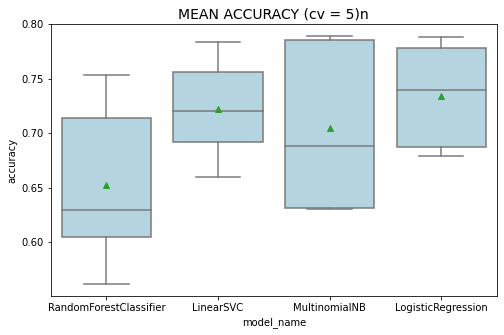

In [363]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [364]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               data.index, test_size=0.25, 
                                                               random_state=1)
model = LogisticRegression( max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [365]:
# Classification report
print('CLASSIFICATIION METRICS')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= data['topics'].unique()))

CLASSIFICATIION METRICS
                   precision    recall  f1-score   support

          Anxiety       0.67      0.70      0.68       393
       Depression       0.74      0.60      0.66       418
             PTSD       0.91      0.82      0.86       433
   Social Anxiety       0.78      0.79      0.79       430
Suicidal thoughts       0.67      0.83      0.74       405

         accuracy                           0.75      2079
        macro avg       0.75      0.75      0.75      2079
     weighted avg       0.76      0.75      0.75      2079



In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
                                                   
                                                 


In [367]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [368]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)
model = LogisticRegression(max_iter=1000).fit(tfidf_vectorizer_vectors, y_train)


In [369]:
result = """Does anyone else get depressive thoughts and immediately hate yourself for them after? Whenever I think depressive thoughts like "your friends are all pulling away from you because they don't need you" or "Everyone is better off without you because you're such a burden" or whatever else, those thoughts are immediately followed by thoughts about how I'm stupid and selfish and childish for wallowing in pity and I should just suck it up because I need to grow up and realize that it's not all about me. 

It feels like a cycle that only ever makes me feel worse, especially about trying to reach out and have to burden someone else with my shit when they have their own shit going on. 

I couldn't even go to a second therapy session because I felt guilty for taking up the time of those who have to drive me there, and for taking up time from the counselor that could be used for someone that needed it a lot more.

Does anyone else get like this?"""
print(model.predict(fitted_vectorizer.transform([result])))


['Depression']


In [370]:
 result = """mood disorder. It causes severe symptoms that affect how you feel, think, and handle daily activities,
 such as sleeping, eating, or working. To be diagnosed with depression, the symptoms must be present for at least two 
 weeks."""
print(model.predict(fitted_vectorizer.transform([result])))


['Depression']


In [371]:
 result = """Tiredness or low energy, even when rested
Restlessness or difficulty concentrating
Difficulty in carrying out daily activities
Changes in appetite or sleep patterns
Aches or pains that have no obvious cause."""
print(model.predict(fitted_vectorizer.transform([result])))


['Depression']


In [372]:
result = """Persistent sadness, anxiousness or irritability
Loss of interest in friends and activities that they normally enjoy
Withdrawal from others and loneliness
Feelings of worthlessness, hopelessness or guilt
Taking risks they wouldn’t normally take  
"""
print(model.predict(fitted_vectorizer.transform([result])))


['Depression']


In [373]:
result = """They try to avoid situations where they might have to speak

They withdraw from their personal and professional relationships

They usually avoid eye contact in social settings"""
print(model.predict(fitted_vectorizer.transform([result])))

['Social Anxiety']


In [374]:
result = """Sexual or physical abuse or assault
Serious vehicle accidents
Combat or war zone exposure
Serious medical events
Seeing death or dead bodies, including while at work
Unexpected death of a loved one
Natural disasters
Arson or house fires
Torture
Domestic violence
Witnessing or experiencing violence, such as a homicide or suicide
Terrorism or mass violence"""
print(model.predict(fitted_vectorizer.transform([result])))

['PTSD']


In [375]:
result = """They try to avoid situations where they might have to speak

They withdraw from their personal and professional relationships

They usually avoid eye contact in social settings"""
print(model.predict(fitted_vectorizer.transform([result])))

['Social Anxiety']


In [376]:
result = """ Recurrent, unwanted distressing memories of the traumatic event
Reliving the traumatic event as if it were happening again (flashbacks)
Upsetting dreams or nightmares about the traumatic event
Severe emotional distress or physical reactions to something that reminds you of the traumatic event"""
print(model.predict(fitted_vectorizer.transform([result])))

['PTSD']


In [377]:
predicted_output="""Feeling sad or down
Confused thinking or reduced ability to concentrate
Excessive fears or worries, or extreme feelings of guilt
Extreme mood changes of highs and lows
Withdrawal from friends and activities
Significant tiredness, low energy or problems sleeping
Detachment from reality (delusions), paranoia or hallucinations
Inability to cope with daily problems or stress
Trouble understanding and relating to situations and to people
Problems with alcohol or drug use
Major changes in eating habits
Sex drive changes
Excessive anger, hostility or violence
Suicidal thinking"""
print(model.predict(fitted_vectorizer.transform([predicted_output])))

['Depression']


In [378]:
predicted_output1="""feeling uneasy, fidgety, or anxious.
feeling of worry, imminent peril, or catastrophe.
experiencing an elevated heart rate.
fast breathing .
feeling drained or feeble.."""
print(model.predict(fitted_vectorizer.transform([predicted_output1])))

['Anxiety']


In [379]:
predicted_output1=""" And if I had to do something a bit weirder (even like just carrying a large bag or some unusual items), I would be panicking the whole time. It got to the point where I became afraid I was breathing too loud, so I started focusing on my breathing, I could barely breathe because of the anxiety, and therefore I became even more anxious.

So anyway, I thought maybe I could get used to situations like this if I started hanging out with people that don't care as much as I do. And he was actually a really fun and interesting guy, so sometimes my social anxiety around him was a bit better. But then I found out he probably thinks I'm into him, since I was always acting a bit nervous and trying to spend a lot of time with him. And I started freaking out, because I don't like him in that way, so I didn't want him to think anything. And suddenly I didn't know what to say, and it all became really awkward. And now I'm afraid he thinks it even more, so I'm more anxious and it's even more awkward... And now I feel like I kinda lost one of my very few friends and it makes me really sad...

I."""
print(model.predict(fitted_vectorizer.transform([predicted_output1])))

['Social Anxiety']


,post,topics,clean_text,category_id,msg_tokenized
0,Does anyone else get anxious with working? im scared that im going to have to do repairs that cost of money.,Anxiety,anyone else get anxious working im scared im going repairs cost money,0,"[anyone, else, get, anxious, working, im, scared, im, going, repairs, cost, money]"
1,"Help with anxiety-inducing fears about school caused by a health issue I'm 35 and planning to go back to grad school, but over the years I developed some eye floaters that I can mostly ignore. They are just out of my visible sight range when reading small books like novels, but I started studying for the GRE with a big textbook and realized how obvious these floaters were now, and they've left me with anxiety about how I'm going to cope with school if, on top of everything else like how I'm no longer used to student life, how grad school is likely the hardest form of school I've ever done etc, add to that this problem with distracting floaters in my eyes that distract and annoy me.\n\nI really don't know how to deal here. I am not confident in exposure therapy as I have had these floaters for a few years and really only learned to deal with them by changing my lifestyle such that I don't have to deal with them. It's not a big issue, and some junk in my eyes shouldn't be THAT much of a problem. But just now I just glanced at my book for a few minutes and now I'm dizzy with worry about it.\n\nWhat to do?",Anxiety,help anxietyinducing fears school caused health issue im 35 planning go back grad school years developed eye floaters mostly ignore visible sight range reading small books like novels started studying gre big textbook realized obvious floaters theyve left anxiety im going cope school top everything else like im longer used student life grad school likely hardest form school ive ever done etc add problem distracting floaters eyes distract annoy really dont know deal confident exposure therapy floaters years really learned deal changing lifestyle dont deal big issue junk eyes shouldnt much problem glanced book minutes im dizzy worry,0,"[help, anxietyinducing, fears, school, caused, health, issue, im, 35, planning, go, back, grad, school, years, developed, eye, floaters, mostly, ignore, visible, sight, range, reading, small, books, like, novels, started, studying, gre, big, textbook, realized, obvious, floaters, theyve, left, anxiety, im, going, cope, school, top, everything, else, like, im, longer, used, student, life, grad, school, likely, hardest, form, school, ive, ever, done, etc, add, problem, distracting, floaters, eyes, distract, annoy, really, dont, know, deal, confident, exposure, therapy, floaters, years, really, learned, deal, changing, lifestyle, dont, deal, big, issue, junk, eyes, shouldnt, much, problem, glanced, book, minutes, im, dizzy, worry]"
2,"Use up what's left and throw the rest away I recently returned from 6 years working overseas.\n\nUnfortunately in the last few years my drinking and stimulant became worse and was detrimental to my mental and physical health.\n\nI'm doing fine now as far as that is concerned. Attended therapy, clean and sober since November last year.\n\nWhen I came back I heard a few of my ""friends"" use the following phrase,\n\n""we'll just use up what's left of him and then throw the rest away""\n\nI've never heard this before. I've always been a people pleasing personality type and I'm struggling hard to determine how to interpret it.\n\nMaybe I just don't want to face facts that it means exactly what it says... That by hanging around with these people I put myself in a weak position and they aren't real friends at all.\n\nAny thoughts?",Anxiety,use whats left throw rest away recently returned 6 years working overseas unfortunately last years drinking stimulant became worse detrimental mental physical health im fine far concerned attended therapy clean sober since november last year came back heard friends use following phrase well use whats left throw